# Statistical Data Management Session 10: Inferences Based on a Two Samples Tests of Hypothesis (chapter 9 in McClave & Sincich)


## 1. Executive Workout Dropouts *(Ex 9.116 from the book)*

The *Journal of Sport Behaviour* (2001) conducted a study of variety in exercise workouts. One group of 40 people varied their exercise routine in workouts, while a second group of 40 exercisers had no set schedule or regulations for their workouts. By the end of the study, 15 people had dropped out of the first exercise group and 23 had dropped out of the second group.

1. Find the dropout rates (i.e., the percentage of exercisers who had dropped out of the exercise group) for each of the two groups of exercisers. 
2. Find a 90% confidence interval for the difference between the dropout rates of the two groups of exercisers.
3. Give a practical interpretation of the confidence interval you found in part 2.
4. Suppose you want to estimate the true difference in dropout rates to within 0.1, with the 90% confidence interval. Determine the number of exercisers to be sampled from each group in order to obtain such an estimate. Assume equal sample sizes, and use the estimate from earlier, i.e. assume $p_1 \approx \hat{p_1}$ and $p_2 \approx \hat{p_2}$.

In [84]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
import time
%matplotlib inline

n_1 = 40
n_2 = 40
p_hat1 = 15 / n_1
p_hat2 = 23 / n_2
q_hat1 = 1 - p_hat1
q_hat2 = 1 - p_hat2

2. 90% confidence interval for the difference between the dropout rates of the two groups of exercisers: 

In [85]:
# check for large sample => all satisfied
print(n_1*p_hat1 >= 15)
print(n_1*q_hat1 >= 15)
print(n_2*p_hat2 >= 15)
print(n_2*q_hat2 >= 15)

# confidence interval
standard_normal = sts.norm(0,1)
alpha = 0.1
z_alpha_div2 = standard_normal.ppf(1 - alpha/2)
print(z_alpha_div2)

term = z_alpha_div2 * np.sqrt((p_hat1*q_hat1/n_1)+(p_hat2*q_hat2/n_2))
left_bound =  (p_hat1 - p_hat2) - term
right_bound = (p_hat1 - p_hat2) + term
interval = [left_bound, right_bound]
print(interval)

True
True
True
True
1.6448536269514722
[-0.37994991863350325, -0.020050081366496636]


3. We are 90% confident that the difference between the dropout rates of the two groups of exercisers is between -0.38 and -0.02. Since both ends of this confidence interval are less than 0, there is evidence that the dropout rate for the "varied exercise" group is less than the rate for the "no schedule" group.

4. This would mean that the term subtracted and added when calculating a confidence interval, the 

    $z_{\alpha/2}\sqrt{\frac{\hat{p}_1\hat{q}_1}{n_1}+\frac{\hat{p}_2\hat{q}_2}{n_2}}$

    is at most 0.1. Using the fact that $n_1 = n_2$ and solving for $n_1$ yields:
    $n_1 = (\hat{p}_1\hat{q}_1+\hat{p}_2\hat{q}_2)z_{\alpha/2}^2 \frac{1}{0.01}$. 
    
    Round up to the nearest natural number to be on the safe side:

In [86]:
print(np.ceil((p_hat1*q_hat1+p_hat2*q_hat2)*z_alpha_div2**2/0.01))

130.0


## 2. Salary Increase

Do workers generally increase their salary when changing jobs? To test this, 18 workers in a certain field are interviewed before and after they change jobs. Assume that salaries in this field are normally distributed.

1. Formulate $H_0$ and $H_a$.

This is a paired sample. $H_0: D_0 = \mu_2-\mu_1=0$, we test whether workers increase their salary, so perform a one-sided test $H_a: D_0 > 0$. 

2. Run the cell below to define the dataframe.

In [87]:
df_salaries = pd.DataFrame({
    'before_change': [1750,1875,1803,1862,1543,2122,1967,1781,2071,2051,1700,1564,1444,1715,1599,1907,2142,1801],
    'after_change': [1795,1928,1896,1834,1567,1630,1832,1892,1854,1831,1823,1816,1915,1734,2018,1727,1688,2089]})
print(df_salaries)

    before_change  after_change
0            1750          1795
1            1875          1928
2            1803          1896
3            1862          1834
4            1543          1567
5            2122          1630
6            1967          1832
7            1781          1892
8            2071          1854
9            2051          1831
10           1700          1823
11           1564          1816
12           1444          1915
13           1715          1734
14           1599          2018
15           1907          1727
16           2142          1688
17           1801          2089


3. Perform the test of hypothesis at $\alpha = 0.05$. Also calculate and interpret the $p$-value.

In [6]:
differences = df_salaries['after_change'] - df_salaries['before_change']
#print(differences)
x_d = differences.mean()
s_d = differences.std()
n_d = len(differences)

D_0 = 0
alpha = 0.05
t_distribution = sts.t(n_d - 1) # To account for the fact that sigma_d is unknown. If it was: use standard normal (z-distribution) instead
t_alpha = t_distribution.ppf(1 - alpha) # RHS because one-sided > 0 ("increase in wage")

t_statistic = (x_d - D_0) / (s_d / np.sqrt(n_d))
print("Test statistic:   ", t_statistic)
print("Critical t value: ", t_alpha)
# Conclusion: at alpha = 0.05, the observed difference in wages is not significant.
print("p-value:          ", 1 - t_distribution.cdf(t_statistic)) # RHS because one-sided > 0 ("increase in wage")
# Conclusion: this is de probability that, if H_0 is true, we obtain this or a larger mean difference in wages in a sample
# => as this probability is not lower than alpha = 0.05, we do not reject the null hypothesis.

Test statistic:    0.1539328495347353
Critical t value:  1.7396067260750672
p-value:           0.43973764003952653


4. What would change in case of a large sample?

In that case ($n\geq30)$, you would use a $z$-distribution (= standard normal distribution) to calculate the critical value:

In [97]:
z_distribution = sts.norm(0, 1)
z_alpha = z_distribution.ppf(1 - alpha)
print(z_alpha)

1.6448536269514722


## 3. Pumpkin fertiliser *(ex. 9.23 from the book)*
To test the effect of two types of fertiliser, a sample of 52 pumpkins was equally divided into two groups, and each fertilised using only type A or type B, respectively. Summary statistics for the weights (in kg) of the pumpkins at harvest are shown in the accompanying table. You may assume pumpkin weights follow a normal distribution.

| | Type A| Type B|
|:---| :---:| :---:|
|sample size | 26| 26|
|mean|28.6|24.9|
|standard deviation|12.5|12.2|


1. In order to determine whether or not the difference in mean between the two types is significant, the researchers would have to assume that the variance of weights in the two groups is the same. Test the validity of this assumption using a test at $\alpha=0.05$.
2. Compare the mean weight for the two groups at $\alpha=0.05$ and give a practical interpretation of the result.

1. We test, two-sided, whether there is a difference in the variances between the groups: $H_0: \sigma_1^2 = \sigma_2^2; H_a: \sigma_1^2 \neq \sigma_2^2$.

Test statistic:    1.0497850040311747
Critical F value:  2.2303020947471466


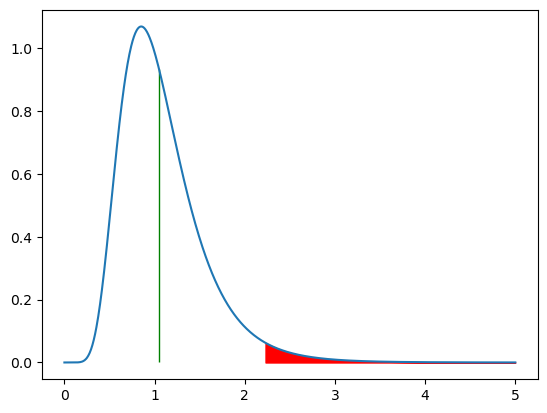

In [7]:
n_1 = 26
x_bar1 = 28.6
s_1 = 12.5
n_2 = 26
x_bar2 = 24.9
s_2 = 12.2

alpha = 0.05

F_test_statistic = s_1**2 / s_2**2 # always "largest / smallest"!
print("Test statistic:   ", F_test_statistic)

F_distribution = sts.f(dfn=n_1-1, dfd=n_2-1)
critical_F_value = F_distribution.ppf(1 - alpha/2) 
print("Critical F value: ", critical_F_value)

interval = np.linspace(0, 5, 1000)
part = np.linspace(critical_F_value, 5, 100)
test_statistic = np.linspace(F_test_statistic, F_test_statistic, 1)
plt.plot(interval, F_distribution.pdf(interval))
plt.fill_between(part, F_distribution.pdf(part), color='red')
plt.fill_between(test_statistic, F_distribution.pdf(test_statistic), color='green')
plt.show()
plt.close()

The test statistic doesn't lie in the critical region, so we don't reject $H_0$ and can continue the analysis under the assumption that the population variances are equal.

2. Here, $H_0$ would be that there is no difference between the means of the groups ($D_0=0$), $H_a$ that there is ($D_0\neq 0$), so a two-sided test. As both $n_1 < 30$ and $n_2 < 30$, we use the corrected test for a small sample.

In [8]:
D_0 = 0
s2_p = (((n_1-1) * s_1**2) + ((n_2-1) * s_2**2)) / (n_1-1+n_2-1)
print(s2_p)
t_test_statistic = (x_bar1 - x_bar2 - D_0) / np.sqrt((s2_p) * ((1/n_1) + (1/n_2)))
print("Test statistic:   ", t_test_statistic)

degrees_of_freedom = n_1 + n_2 - 2
t_distribution = sts.t(degrees_of_freedom)
critical_t_value = t_distribution.ppf(1 - alpha/2)
print("Critical t value: ", critical_t_value)

152.545
Test statistic:    1.08012597854859
Critical t value:  2.008559109715206


We conclude that we cannot reject $H_0$, the observed difference between the groups is not significant at the $\alpha=0.05$ level.

## 4. Automated testing

Write a function that accepts 4 parameters: (1&2) two large ($n_i\geq30)$ dataframes containing quantitative data, (3) a string indicating whether we test for "larger", "two-sided" or "smaller" and (4) an alpha significance level. The function calculates and returns whether the difference in mean between the dataframes is significantly larger/different/smaller on the given level of significance.

In [94]:

def test_is_significant(df1, df2, kind, alpha):
    x_bar_1 = df1.mean()
    x_bar_2 = df2.mean()
    sigma_sq_1 = df1.var()
    sigma_sq_2 = df2.var()
    n_1 = len(df1)
    n_2 = len(df2)

    z = (x_bar_1 - x_bar_2) / np.sqrt(sigma_sq_1/n_1 + sigma_sq_2/n_2)
    #print("z statistic: ", z)
    
    z_distr = sts.norm(0, 1)
    if kind == "two-sided":
        z_crit = z_distr.ppf(1 - alpha/2)
        #print("z threshold: ", -z_crit, "and", z_crit)
        return (z < -z_crit) | (z > z_crit)
    elif kind == "larger":  # mean df2 significantly larger than that of df1 => difference < 0
        z_crit = z_distr.ppf(alpha)
        #print("z threshold: ", z_crit)
        return z < z_crit
    elif kind == "smaller": # mean df2 significantly smaller than that of df1 => difference > 0
        z_crit = z_distr.ppf(1 - alpha)
        #print("z threshold: ", z_crit)
        return z > z_crit
    else:
        raise Exception("invalid test kind")
    

mean a: 0    40.91866
dtype: float64
mean b: 0    42.359931
dtype: float64


In [96]:
dataframe_a = pd.read_csv("../../shared/dataframe_a.csv", header=None)
dataframe_b = pd.read_csv("../../shared/dataframe_b.csv", header=None)
print("mean a:", dataframe_a.mean())
print("mean b:", dataframe_b.mean())

mean a: 0    40.91866
dtype: float64
mean b: 0    42.359931
dtype: float64


In [95]:
# These should yield a non-significant test result (False, i.e. don't reject H_0)
print(test_is_significant(dataframe_a, dataframe_b, "larger", 0.005))
print(test_is_significant(dataframe_b, dataframe_a, "smaller", 0.005))
print(test_is_significant(dataframe_a, dataframe_b, "two-sided", 0.01))
print(test_is_significant(dataframe_b, dataframe_a, "two-sided", 0.01))
print(test_is_significant(dataframe_b, dataframe_a, "larger", 0.01))
print()

# These tests should be significant (True, i.e. reject H_0)
print(test_is_significant(dataframe_a, dataframe_b, "larger", 0.01))
print(test_is_significant(dataframe_b, dataframe_a, "smaller", 0.01))
print(test_is_significant(dataframe_a, dataframe_b, "two-sided", 0.02))
print(test_is_significant(dataframe_b, dataframe_a, "two-sided", 0.02))



0    False
dtype: bool
0    False
dtype: bool
0    False
dtype: bool
0    False
dtype: bool
0    False
dtype: bool

0    True
dtype: bool
0    True
dtype: bool
0    True
dtype: bool
0    True
dtype: bool


## 5. SQL Recap

The file ``salary_differences.sql`` provided on Toledo contains the information used in exercise 2. Import the file using MySQL Workbench and write the appropriate queries to retrieve the relevant information. Re-run your analysis (without running the cell which defined the dataframe!) to check whether you have the correct information. Note that some workers have a ``NULL`` value in the table listing wages after they changed jobs. This indicates that these workers didn't change jobs (and should therefore be excluded from the result).

In [93]:
conn = sqlite3.connect("../../shared/salary_differences.db")

query = """
SELECT before_change.salary AS before_change, after_change.salary AS after_change 
FROM before_change 
JOIN after_change ON before_change.worker_id = after_change.worker_id 
WHERE after_change.salary IS NOT NULL
"""

df_salaries = pd.read_sql_query(query, conn)
print(df_salaries)

# Note that our analysis still works!
differences = df_salaries['after_change'] - df_salaries['before_change']
#print(differences)
x_d = differences.mean()
s_d = differences.std()
n_d = len(differences)

D_0 = 0
alpha = 0.05
t_distribution = sts.t(n_d - 1)
t_alpha = t_distribution.ppf(1 - alpha)

t_statistic = (x_d - D_0) / (s_d / np.sqrt(n_d))
print("Test statistic:   ", t_statistic)
print("Critical t value: ", t_alpha)
# Conclusion: at alpha = 0.05, the observed difference in wages is not significant.

    before_change  after_change
0            1750          1795
1            1875          1928
2            1803          1896
3            1862          1834
4            1543          1567
5            2122          1630
6            1967          1832
7            1781          1892
8            2071          1854
9            2051          1831
10           1700          1823
11           1564          1816
12           1444          1915
13           1599          2018
14           1907          1727
15           2142          1688
16           1801          2089
17           1715          1734
Test statistic:    0.1539328495347353
Critical t value:  1.7396067260750672
